In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Train",target_size=(224, 224),batch_size=32,shuffle=True,class_mode="categorical")
test_generator = test_datagen.flow_from_directory("/content/drive/MyDrive/Resized Pearl Millet/Test",target_size=(224,224),batch_size=32,shuffle=False,class_mode="categorical")

Found 1789 images belonging to 3 classes.
Found 454 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Xception(weights='/content/drive/MyDrive/Models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224,224, 3))

In [ ]:
model = Xception(weights='/content/drive/MyDrive/Models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224,224, 3))
for layer in model.layers[:-5]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation="softmax")(x)
model_final = tf.keras.models.Model(model.input, predictions)

model_final.compile(optimizer = RMSprop(lr=0.0001, decay=1e-6),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
xception_history = model_final.fit(train_generator, validation_data = test_generator, steps_per_epoch = 56, epochs = 150)

Epoch 1/150
56/56 [==============================] - 35s 519ms/step - loss: 1.3316 - accuracy: 0.7870 - val_loss: 1.1233 - val_accuracy: 0.8018
Epoch 2/150
56/56 [==============================] - 28s 504ms/step - loss: 0.3922 - accuracy: 0.9039 - val_loss: 0.2485 - val_accuracy: 0.9427
Epoch 3/150
56/56 [==============================] - 28s 490ms/step - loss: 0.3226 - accuracy: 0.9307 - val_loss: 0.7114 - val_accuracy: 0.9075
Epoch 4/150
56/56 [==============================] - 28s 492ms/step - loss: 0.2714 - accuracy: 0.9430 - val_loss: 0.4383 - val_accuracy: 0.9339
Epoch 5/150
56/56 [==============================] - 27s 487ms/step - loss: 0.2682 - accuracy: 0.9435 - val_loss: 0.2053 - val_accuracy: 0.9626
Epoch 6/150
56/56 [==============================] - 27s 485ms/step - loss: 0.2053 - accuracy: 0.9570 - val_loss: 0.6170 - val_accuracy: 0.9229
Epoch 7/150
56/56 [==============================] - 27s 487ms/step - loss: 0.2117 - accuracy: 0.9625 - val_loss: 0.2100 - val_accuracy:

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model_final.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[138   4   7]
 [  0 111   2]
 [  1   0 191]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.99      0.93      0.96       149
             Healthy       0.97      0.98      0.97       113
        Rust disease       0.95      0.99      0.97       192

            accuracy                           0.97       454
           macro avg       0.97      0.97      0.97       454
        weighted avg       0.97      0.97      0.97       454



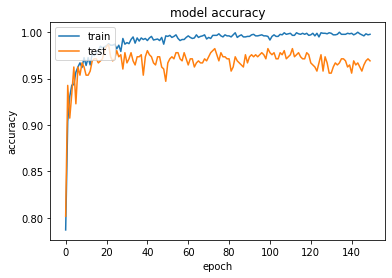

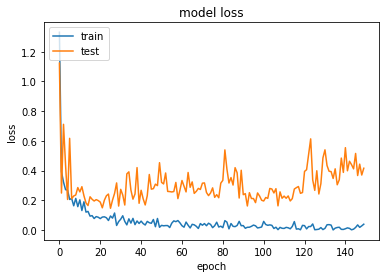

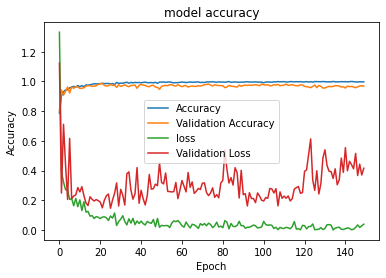

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(xception_history.history['accuracy'])
plt.plot(xception_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(xception_history.history['loss'])
plt.plot(xception_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(xception_history.history['accuracy'])
plt.plot(xception_history.history['val_accuracy'])
plt.plot(xception_history.history['loss'])
plt.plot(xception_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
model = Xception(weights='/content/drive/MyDrive/Models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224,224, 3))
for layer in model.layers[:-5]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation="softmax")(x)
model_final = tf.keras.models.Model(model.input, predictions)

model_final.compile(optimizer = SGD(lr=1e-5,momentum=0.9),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
xception_history = model_final.fit(train_generator, validation_data = test_generator, steps_per_epoch = 56, epochs = 150)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
56/56 [==============================] - 30s 497ms/step - loss: 1.1646 - accuracy: 0.3622 - val_loss: 0.9346 - val_accuracy: 0.4890
Epoch 2/150
56/56 [==============================] - 27s 474ms/step - loss: 0.9974 - accuracy: 0.5098 - val_loss: 0.7774 - val_accuracy: 0.6300
Epoch 3/150
56/56 [==============================] - 27s 480ms/step - loss: 0.8871 - accuracy: 0.5769 - val_loss: 0.6643 - val_accuracy: 0.7687
Epoch 4/150
56/56 [==============================] - 27s 479ms/step - loss: 0.7965 - accuracy: 0.6696 - val_loss: 0.6083 - val_accuracy: 0.8370
Epoch 5/150
56/56 [==============================] - 27s 475ms/step - loss: 0.7420 - accuracy: 0.6993 - val_loss: 0.5816 - val_accuracy: 0.8678
Epoch 6/150
56/56 [==============================] - 27s 484ms/step - loss: 0.6742 - accuracy: 0.7390 - val_loss: 0.5575 - val_accuracy: 0.8678
Epoch 7/150
56/56 [==============================] - 27s 485ms/step - loss: 0.6420 - accuracy: 0.7624 - val_loss: 0.5338 - val_accuracy:

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model_final.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(xception_history.history['accuracy'])
plt.plot(xception_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(xception_history.history['loss'])
plt.plot(xception_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(xception_history.history['accuracy'])
plt.plot(xception_history.history['val_accuracy'])
plt.plot(xception_history.history['loss'])
plt.plot(xception_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()

In [ ]:
model = Xception(weights='/content/drive/MyDrive/Models/xception_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224,224, 3))
for layer in model.layers[:-5]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation="softmax")(x)
model_final = tf.keras.models.Model(model.input, predictions)

model_final.compile(optimizer = Adam(lr=0.0001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
xception_history = model_final.fit(train_generator, validation_data = test_generator, steps_per_epoch = 56, epochs = 150)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/150
56/56 [==============================] - 37s 536ms/step - loss: 0.6707 - accuracy: 0.8083 - val_loss: 0.1845 - val_accuracy: 0.9515
Epoch 2/150
56/56 [==============================] - 28s 491ms/step - loss: 0.2430 - accuracy: 0.9195 - val_loss: 0.2343 - val_accuracy: 0.9449
Epoch 3/150
56/56 [==============================] - 28s 499ms/step - loss: 0.1485 - accuracy: 0.9508 - val_loss: 0.2338 - val_accuracy: 0.9317
Epoch 4/150
56/56 [==============================] - 27s 484ms/step - loss: 0.1460 - accuracy: 0.9519 - val_loss: 0.1494 - val_accuracy: 0.9604
Epoch 5/150
56/56 [==============================] - 27s 483ms/step - loss: 0.1248 - accuracy: 0.9609 - val_loss: 0.1586 - val_accuracy: 0.9515
Epoch 6/150
56/56 [==============================] - 27s 487ms/step - loss: 0.1485 - accuracy: 0.9530 - val_loss: 0.1184 - val_accuracy: 0.9626
Epoch 7/150
56/56 [==============================] - 28s 491ms/step - loss: 0.1184 - accuracy: 0.9620 - val_loss: 0.1336 - val_accuracy:

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Y_pred = model_final.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = ["Downy mildew disease","Healthy","Rust disease"]
print(classification_report(test_generator.classes, y_pred,target_names=target_names))

Confusion Matrix
[[141   5   3]
 [  0 111   2]
 [  1   2 189]]
Classification Report
                      precision    recall  f1-score   support

Downy mildew disease       0.99      0.95      0.97       149
             Healthy       0.94      0.98      0.96       113
        Rust disease       0.97      0.98      0.98       192

            accuracy                           0.97       454
           macro avg       0.97      0.97      0.97       454
        weighted avg       0.97      0.97      0.97       454



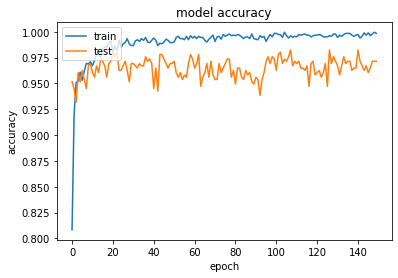

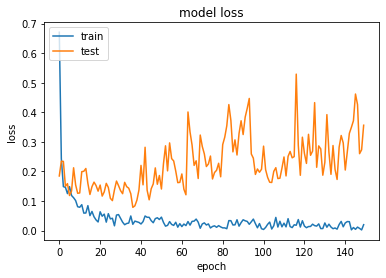

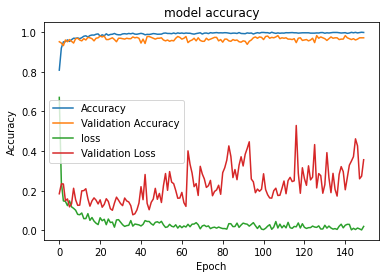

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(xception_history.history['accuracy'])
plt.plot(xception_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(xception_history.history['loss'])
plt.plot(xception_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
plt.plot(xception_history.history['accuracy'])
plt.plot(xception_history.history['val_accuracy'])
plt.plot(xception_history.history['loss'])
plt.plot(xception_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Validation Accuracy','loss','Validation Loss'])
plt.show()